In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, lr=1, epochs=100):
        self.W = np.zeros(input_size+1)
        self.epochs = epochs
        self.lr = lr

    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a

    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x

# OR Gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
d_or = np.array([0, 1, 1, 1])

perceptron_or = Perceptron(input_size=2)
perceptron_or.fit(X, d_or)
print("OR Gate:")
print("Weights:", perceptron_or.W)

# AND Gate
d_and = np.array([0, 0, 0, 1])

perceptron_and = Perceptron(input_size=2)
perceptron_and.fit(X, d_and)
print("\nAND Gate:")
print("Weights:", perceptron_and.W)

OR Gate:
Weights: [-1.  1.  1.]

AND Gate:
Weights: [-3.  2.  1.]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('horseRacing.csv')
df.head()

,race_id,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,...,3-132,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price
0,495886,565129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.71,...,-1.16,0.0,1.87,1.87,-2.07,-1.96,-1.95,-0.30,8.0,17.0
1,495886,607093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,...,0.77,0.0,0.00,0.00,0.00,0.00,0.00,0.07,5.0,26.0
2,495886,637337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.97,...,-1.16,0.0,0.00,0.00,0.48,0.44,0.39,-0.86,7.0,17.0
3,495886,659819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,0.77,0.0,0.00,0.00,0.32,1.09,0.78,-0.86,1.0,4.0
4,495886,661530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,...,0.77,0.0,0.00,0.00,0.00,0.00,0.39,1.17,4.0,7.0


In [ ]:
# 2. Clean the dataset
df.fillna(df.mean(), inplace=True)

# 3. Convert labels into 0 or 1
df['label'] = df['calc_position'].apply(lambda x: 1 if x > df['calc_position'].mean() else 0)

df.head()

,race_id,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,...,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price,label
0,495886,565129,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.71,...,0.0,1.87,1.87,-2.07,-1.96,-1.95,-0.30,8.0,17.0,1
1,495886,607093,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.05,...,0.0,0.00,0.00,0.00,0.00,0.00,0.07,5.0,26.0,0
2,495886,637337,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.97,...,0.0,0.00,0.00,0.48,0.44,0.39,-0.86,7.0,17.0,1
3,495886,659819,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,0.21,...,0.0,0.00,0.00,0.32,1.09,0.78,-0.86,1.0,4.0,0
4,495886,661530,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,0.08,...,0.0,0.00,0.00,0.00,0.00,0.39,1.17,4.0,7.0,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
race_id,98390.0,593346.525999,55771.004433,495886.00,544068.000000,591423.000000,641592.000000,719014.00
horse_id,98390.0,821921.176187,152995.882350,6496.00,747440.250000,801212.000000,857812.750000,2501738.00
1-101,98390.0,-0.035803,0.427763,-2.88,-0.035803,-0.035803,-0.035803,4.76
1-102,98390.0,-0.038562,0.426691,-2.37,-0.038562,-0.038562,-0.038562,4.66
1-103,98390.0,-0.040769,0.426557,-2.70,-0.040769,-0.040769,-0.040769,4.20
...,...,...,...,...,...,...,...,...
4-116,98390.0,0.100101,0.861313,-2.97,-0.480000,0.000000,0.580000,3.89
4-117,98390.0,-0.008975,0.862115,-2.40,-0.610000,-0.200000,0.330000,4.26
calc_position,98390.0,5.926687,3.903365,0.00,3.000000,5.000000,8.000000,31.00
price,98390.0,20.720690,30.391718,0.00,6.000000,12.000000,24.000000,1001.00


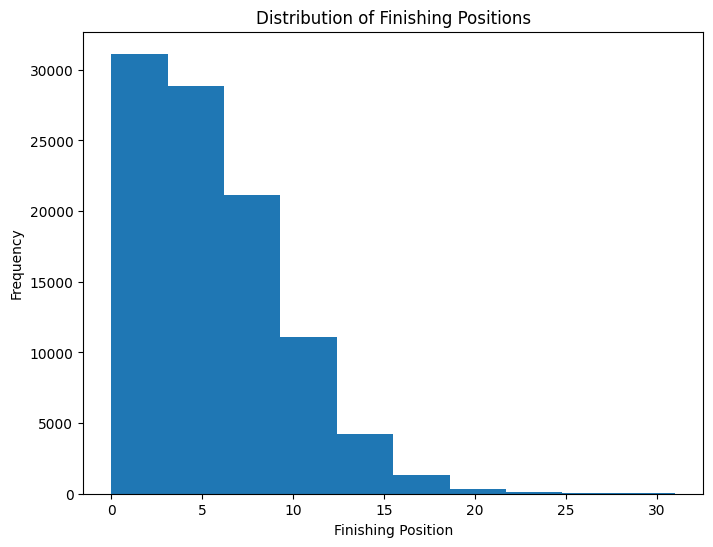

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['calc_position'], bins=10)
plt.xlabel('Finishing Position')
plt.ylabel('Frequency')
plt.title('Distribution of Finishing Positions')
plt.show()

In [ ]:
# 6. Implement one hot encoding on Race ID Column
race_id_onehot = pd.get_dummies(df['race_id'], prefix='race')
df = pd.concat([df, race_id_onehot], axis=1)
df.drop('race_id', axis=1, inplace=True)

df.head()

,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,1-109,...,race_691306,race_691329,race_691331,race_691338,race_691538,race_691540,race_691872,race_691908,race_691981,race_719014
0,565129,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.71,0.78,...,0,0,0,0,0,0,0,0,0,0
1,607093,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.05,0.78,...,0,0,0,0,0,0,0,0,0,0
2,637337,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.97,1.60,...,0,0,0,0,0,0,0,0,0,0
3,659819,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,0.21,-0.88,...,0,0,0,0,0,0,0,0,0,0
4,661530,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,0.08,-0.05,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 7. Implement One hot encoding for Horse ID Column
horse_id_onehot = pd.get_dummies(df['horse_id'], prefix='horse')
df = pd.concat([df, horse_id_onehot], axis=1)
df.drop('horse_id', axis=1, inplace=True)

df.head()

In [ ]:
# Split the dataset into features and target variable
X = df.drop('label', axis=1)
y = df['label']

# Drop unnecessary columns
df.drop(columns=['race_id', 'horse_id'], inplace=True)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class MLPClassifierCustom:
    def __init__(self, hidden_layer_sizes=(50, 50), learning_rate=0.01, max_iter=1000, random_state=None):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.weights = None
        self.biases = None

    def _initialize_weights(self, input_size, hidden_sizes, output_size):
        sizes = [input_size] + list(hidden_sizes) + [output_size]
        weights = [np.random.randn(sizes[i], sizes[i+1]) for i in range(len(sizes)-1)]
        biases = [np.zeros((1, sizes[i+1])) for i in range(len(sizes)-1)]
        return weights, biases

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        return x * (1 - x)

    def _forward_propagation(self, X):
        activations = [X]
        for i in range(len(self.weights)):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            a = self._sigmoid(z)
            activations.append(a)
        return activations

    def _backward_propagation(self, X, y, activations):
        output_error = y - activations[-1]
        for i in range(len(self.weights)-1, -1, -1):
            error = output_error * self._sigmoid_derivative(activations[i+1])
            output_error = np.dot(error, self.weights[i].T)
            self.weights[i] += self.learning_rate * np.dot(activations[i].T, error)
            self.biases[i] += self.learning_rate * np.sum(error, axis=0)

    def fit(self, X, y):
        input_size = X.shape[1]
        output_size = 1
        self.weights, self.biases = self._initialize_weights(input_size, self.hidden_layer_sizes, output_size)

        for _ in range(self.max_iter):
            activations = self._forward_propagation(X)
            self._backward_propagation(X, y.reshape(-1, 1), activations)

    def predict(self, X):
        activations = self._forward_propagation(X)
        return np.round(activations[-1]).flatten()

# Train the MLP model
mlp = MLPClassifierCustom(hidden_layer_sizes=(50, 50), max_iter=1000)
mlp.fit(X_train, y_train)

# Predict on the testing set
y_pred = mlp.predict(X_test_scaled)

# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 99.99491818274215

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10109
           1       1.00      1.00      1.00      9569

    accuracy                           1.00     19678
   macro avg       1.00      1.00      1.00     19678
weighted avg       1.00      1.00      1.00     19678

